## Interação e Concorrência 2024/2025

### 3-SAT Problem

##### Gonçalo Gonçalves Barroso A102931
##### Rafaela Antunes Pereira A102527

#### 1 - Realização de uma proposta de uma fórmula booleana 3-SAT

Para este exercício, propomos uma fórmula booleana no formato 3-SAT que é solucionável, ou seja, existe pelo menos uma combinação de valores de verdade que satisfaz todas as cláusulas simultaneamente. A fórmula 
𝐹
F é composta por quatro cláusulas, cada uma contendo exatamente três literais.

$$
F = (x_1 \lor \neg x_2 \lor x_3) \land (\neg x_1 \lor \neg x_2 \lor x_3) \land (x_1 \lor x_2 \lor \neg x_3) \land (\neg x_1 \lor \neg x_2 \lor \neg x_3) \land (x_1 \lor x_2 \lor x_3) \land (x_1 \lor \neg x_2 \lor \neg x_3) \land (\neg x_1 \lor x_2 \lor \neg x_3)
$$


Com o objetivo de verificar a satisfatibilidade da fórmula proposta, procedeu-se à análise de todas as possíveis combinações de valores lógicos atribuídos às variáveis envolvidas. Para facilitar a interpretação dos resultados e a organização da tabela de verdade, optou-se por identificar individualmente cada cláusula da fórmula. Dessa forma, torna-se mais simples observar quais combinações satisfazem todas as cláusulas em simultâneo, garantindo assim a veracidade da fórmula como um todo.

$$
A = x_1 \lor \neg x_2 \lor x_3
$$
$$
B = \neg x_1 \lor x_2 \lor x_3
$$
$$
C = x_1 \lor x_2 \lor \neg x_3
$$
$$
D = \neg x_1 \lor \neg x_2 \lor \neg x_3
$$


| x₁ | ¬x₁ | x₂ | ¬x₂ | x₃ | ¬x₃ | A  | B  | C  | D  | f = A ∧ B ∧ C ∧ D | Resultado                     |
|----|-----|----|-----|----|-----|---------------------|---------------------|----------------------|-----------------------|------------------|------------------------------|
| 0  | 1   | 0  | 1   | 0  | 1   | 1                   | 1                   | 0                    | 1                     | 0                | Não é solução                |
| 0  | 1   | 0  | 1   | 1  | 0   | 1                   | 1                   | 1                    | 0                     | 0                | Não é solução                |
| 0  | 1   | 1  | 0   | 0  | 1   | 1                   | 1                   | 1                    | 1                     | 1                | ✅ **Solução**                |
| 0  | 1   | 1  | 0   | 1  | 0   | 1                   | 1                   | 1                    | 0                     | 0                | Não é solução                |
| 1  | 0   | 0  | 1   | 0  | 1   | 1                   | 0                   | 1                    | 1                     | 0                | Não é solução                |
| 1  | 0   | 0  | 1   | 1  | 0   | 1                   | 1                   | 1                    | 0                     | 0                | Não é solução                |
| 1  | 0   | 1  | 0   | 0  | 1   | 1                   | 0                   | 1                    | 1                     | 0                | Não é solução                |
| 1  | 0   | 1  | 0   | 1  | 0   | 1                   | 1                   | 1                    | 0                     | 0                | Não é solução                |





#### 2- Implementar o Algoritmo de Grover

O algoritmo de Grover é uma versão quantica do algoritmo de busca, que usa o fenômeno de pararelismo quantico para buscar soluçoes para o problema de busca. Este algoritmo apresnta uma melhoria quadrática em relacão ao algoritmo classico.
O algoritmo de Grover divide-se me tres fases, a inicialização, o oracle e o diffuser. Temos que ter em consideração o número de qubits a utilizar.
Sabemos que vamos precisar um qubit para cada variavel inicial, um qubit para o resultado final e por cada claúsula existente na nossa formula, então iremos precisar de 11 qubits


In [53]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

def grover(n_qubits, ids, iterations="optimal"):
    input_registers = list(range(n_qubits))
    ancilla = n_qubits  # qubit auxiliar (ancilla)

    for i in input_registers:
        qml.Hadamard(wires=i)

    qml.Barrier()

    # Inicializa o qubit ancilla em |-⟩ (para refletir com PauliZ após MultiControlledX)
    qml.PauliX(wires=ancilla)
    qml.Hadamard(wires=ancilla)

    if iterations == "optimal":
        its = max(1, round(np.pi/4 * np.sqrt(2**n_qubits / len(ids)) - 0.5))
    else:
        its = iterations

    for _ in range(its):
        # Oracle
        for id in ids:
            for i, bit in enumerate(id):
                if bit == 0:
                    qml.PauliX(wires=input_registers[i])

            qml.MultiControlledX(control_wires=input_registers, wires=ancilla)

            for i, bit in enumerate(id):
                if bit == 0:
                    qml.PauliX(wires=input_registers[i])

        qml.Barrier()

        # Difusor
        for i in input_registers:
            qml.Hadamard(wires=i)
            qml.PauliX(wires=i)

        qml.MultiControlledX(control_wires=input_registers, wires=ancilla)

        for i in input_registers:
            qml.PauliX(wires=i)
            qml.Hadamard(wires=i)

        qml.Barrier()

    return qml.probs(wires=input_registers)


0: ──H──||──X────╭●──X──X─╭●──X──X─╭●──X─╭●───────╭●────╭●─────||──H──X─╭●──X──H──||─┤ ╭Probs
1: ──H──||──X────├●──X────├●───────├●──X─├●──X──X─├●──X─├●─────||──H──X─├●──X──H──||─┤ ├Probs
2: ──H──||───────├●──X────├●──X────├●──X─├●──X────├●──X─├●──X──||──H──X─├●──X──H──||─┤ ╰Probs
3: ─────||──X──H─╰X───────╰X───────╰X────╰X───────╰X────╰X─────||───────╰X────────||─┤       


/home/utilizador/.local/lib/python3.10/site-packages/pennylane/ops/op_math/controlled_ops.py:1177: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


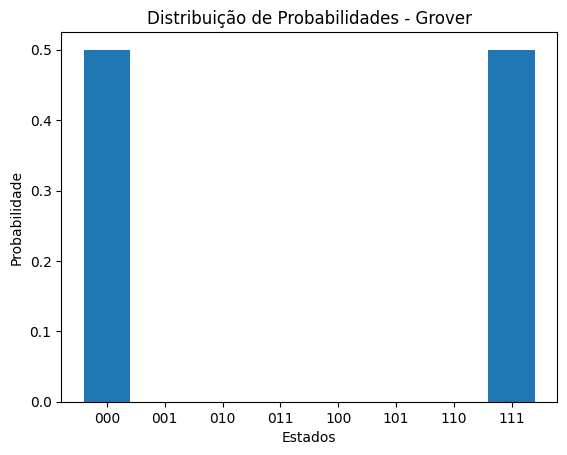

In [54]:
n_qubits = 3
ids = [[0,0,1], [0,1,0], [0,1,1], [1,0,0], [1,0,1], [1,1,0]]

dev = qml.device("default.qubit", wires=n_qubits + 1)
Grover = qml.QNode(grover, dev)

probs = Grover(n_qubits, ids)

# Visualização do circuito
print(qml.draw(Grover, show_all_wires=True)(n_qubits, ids))

# Plotando distribuição de probabilidade
states = [np.binary_repr(i, width=n_qubits) for i in range(2**n_qubits)]
plt.bar(states, probs)
plt.xlabel("Estados")
plt.ylabel("Probabilidade")
plt.title("Distribuição de Probabilidades - Grover")
plt.show()
